# Predict patient outcome (Diabetic = 1 or Non-Diabetic = 0) 

The first stable release of PyCaret can be installed using pip. Using the command line interface or notebook environment, run the below cell of code to install PyCaret.

* pip install pycaret

### 1. Getting Data
In this step-by-step tutorial, we will use ‘diabetes’ dataset and the goal is to predict patient outcome (binary 1 or 0) based on several factors such as Blood Pressure, Insulin Level, Age etc. The dataset is available on PyCaret’s github repository. Easiest way to import dataset directly from repository is by using get_data function from pycaret.datasets modules.

In [1]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
import warnings
warnings.filterwarnings("ignore")

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Setting up Environment
The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). The module used in this example is pycaret.classification.
Once the module is imported, setup() is initialized by defining the dataframe (‘diabetes’) and the target variable (‘Class variable’).

In [2]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

,Description,Value
0,session_id,2409
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### 3. Compare Models
This is the first step recommended in supervised machine learning experiments (classification or regression). This function trains all the models in the model library and compares the common evaluation metrics using k-fold cross validation (by default 10 folds). The evaluation metrics used are:
For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa
For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [3]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7860,0.8152,0.5865,0.7398,0.6499,0.5004,0.5100,0.1520
lda,Linear Discriminant Analysis,0.7785,0.8147,0.5865,0.7189,0.6413,0.4855,0.4933,0.0070
rf,Random Forest Classifier,0.7767,0.8171,0.5822,0.7166,0.6272,0.4770,0.4889,0.0360
ridge,Ridge Classifier,0.7748,0.0000,0.5705,0.7199,0.6316,0.4746,0.4839,0.0140
gbc,Gradient Boosting Classifier,0.7748,0.8326,0.6135,0.7069,0.6519,0.4878,0.4938,0.0150
catboost,CatBoost Classifier,0.7636,0.8279,0.5982,0.6832,0.6299,0.4602,0.4672,0.5780
et,Extra Trees Classifier,0.7598,0.8105,0.5442,0.7063,0.6041,0.4392,0.4526,0.0330
ada,Ada Boost Classifier,0.7540,0.8124,0.6190,0.6604,0.6339,0.4505,0.4550,0.0130
lightgbm,Light Gradient Boosting Machine,0.7431,0.7948,0.6038,0.6449,0.6177,0.4266,0.4313,0.0170
xgboost,Extreme Gradient Boosting,0.7375,0.7925,0.6029,0.6312,0.6095,0.4141,0.4193,0.0730


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2409, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Create Model
Creating a model in any module of PyCaret is as simple as writing create_model. It takes only one parameter i.e. the model name passed as string input. This function returns a table with k-fold cross validated scores and a trained model object.

In [5]:
LogisticRegression = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7346,0.4444,0.6154,0.5161,0.3284,0.3369
1,0.7407,0.8301,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7963,0.8632,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8519,0.8872,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7037,0.7398,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.8148,0.8827,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.8148,0.8602,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7358,0.6873,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8476,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8302,0.8190,0.7222,0.7647,0.7429,0.6163,0.6168


### 5. Tune Model
The tune_model function is used for automatically tuning hyperparameters of a machine learning model. PyCaret uses random grid search over a predefined search space. This function returns a table with k-fold cross validated scores and a trained model object.

In [6]:
tuned_LogisticRegression = tune_model(LogisticRegression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7361,0.4444,0.6154,0.5161,0.3284,0.3369
1,0.7407,0.8286,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7963,0.8647,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8519,0.8872,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7037,0.7383,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.8148,0.8812,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.7963,0.8602,0.5263,0.8333,0.6452,0.5123,0.5389
7,0.7358,0.6905,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8492,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8302,0.8175,0.7222,0.7647,0.7429,0.6163,0.6168


 The tune_model function in unsupervised modules such as pycaret.nlp, pycaret.clustering and pycaret.anomaly can be used in conjunction with supervised modules. For example, PyCaret’s NLP module can be used to tune number of topics parameter by evaluating an objective / cost function from a supervised ML model such as ‘Accuracy’ or ‘R2’.

### 6. Ensemble Model
The ensemble_model function is used for ensembling trained models. It takes only one parameter i.e. a trained model object. This functions returns a table with k-fold cross validated scores and a trained model object.

In [7]:
# creating a decision LogisticRegression model
LogisticRegression = create_model('lr')
# ensembling a trained LogisticRegression model
LogisticRegression_bagged = ensemble_model(LogisticRegression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7377,0.4444,0.5333,0.4848,0.2609,0.2631
1,0.7593,0.8316,0.5263,0.7143,0.6061,0.4384,0.4490
2,0.7963,0.8707,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8333,0.8947,0.7895,0.7500,0.7692,0.6389,0.6394
4,0.7037,0.7128,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.7963,0.8812,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.7963,0.8632,0.5263,0.8333,0.6452,0.5123,0.5389
7,0.7358,0.6714,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8587,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8491,0.8222,0.7222,0.8125,0.7647,0.6542,0.6566


### 7. Plot Model
Performance evaluation and diagnostics of a trained machine learning model can be done using the plot_model function. It takes a trained model object and the type of plot as a string input within the plot_model function.

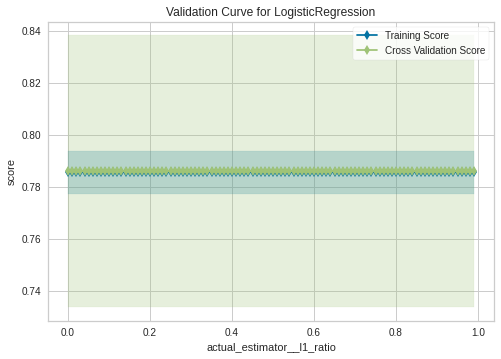

In [8]:
# create a model
LogisticRegression = create_model('lr')
# AUC plot
plot_model(LogisticRegression, plot = 'auc')
# Decision Boundary
plot_model(LogisticRegression, plot = 'boundary')
# Precision Recall Curve
plot_model(LogisticRegression, plot = 'pr')
# Validation Curve
plot_model(LogisticRegression, plot = 'vc')

Alternatively, you can use evaluate_model function to see plots via user interface within notebook.

In [9]:
evaluate_model(LogisticRegression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 8. Interpret Model
When the relationship in data is non-linear which is often the case in real life we invariably see tree-based models doing much better than simple gaussian models. However, this comes at the cost of losing interpretability as tree-based models do not provide simple coefficients like linear models. PyCaret implements SHAP (SHapley Additive exPlanations using interpret_model function.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7377,0.5556,0.5263,0.5405,0.3014,0.3016
1,0.6296,0.7173,0.4211,0.4706,0.4444,0.1680,0.1685
2,0.7963,0.8602,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8148,0.9053,0.8421,0.6957,0.7619,0.6126,0.6201
4,0.7037,0.7504,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.7778,0.7940,0.7368,0.6667,0.7000,0.5242,0.5259
6,0.7407,0.7774,0.5263,0.6667,0.5882,0.4028,0.4088
7,0.6226,0.6921,0.5556,0.4545,0.5000,0.2018,0.2044
8,0.8491,0.8413,0.7778,0.7778,0.7778,0.6635,0.6635
9,0.7547,0.8492,0.6667,0.6316,0.6486,0.4605,0.4609


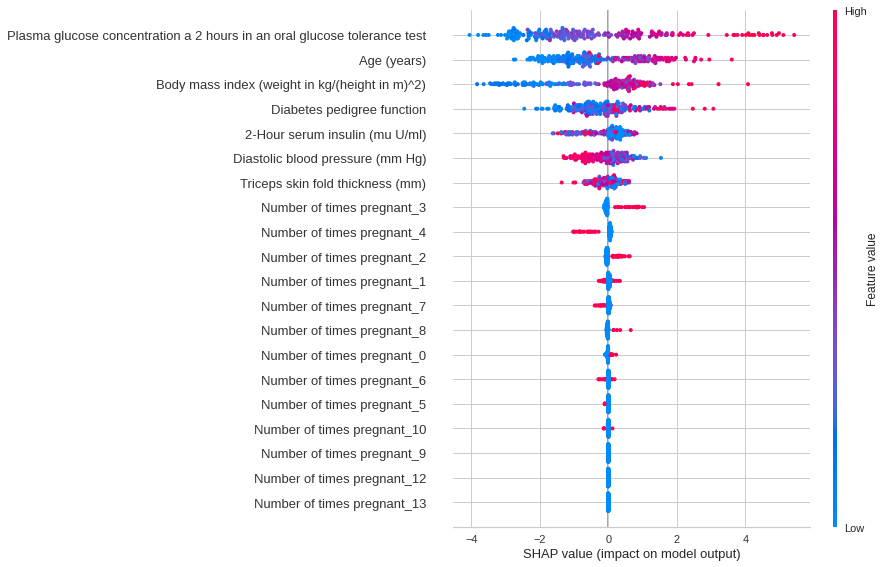

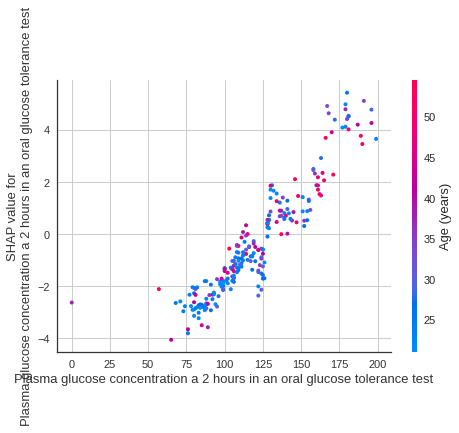

In [10]:
# create a model
xgboost = create_model('xgboost')
# summary plot
interpret_model(xgboost)
# correlation plot
interpret_model(xgboost, plot = 'correlation')

### 9. Predict Model
So far the results we have seen are based on k-fold cross validation on training dataset only (70% by default). In order to see the predictions and performance of the model on the test / hold-out dataset, the predict_model function is used.

In [11]:
# create a model
lr = create_model('lr')

# predict test / hold-out dataset
lr_holdout_pred = predict_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7346,0.4444,0.6154,0.5161,0.3284,0.3369
1,0.7407,0.8301,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7963,0.8632,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8519,0.8872,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7037,0.7398,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.8148,0.8827,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.8148,0.8602,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7358,0.6873,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8476,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8302,0.8190,0.7222,0.7647,0.7429,0.6163,0.6168


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7749,0.8370,0.5122,0.7778,0.6176,0.4676,0.4880


predict_model function is also used to predict unseen dataset. For now, we will use the same dataset we have used for training as a proxy for new unseen dataset. In practice, predict_model function would be used iteratively, every time with a new unseen dataset.

In [12]:
predictions = predict_model(lr, data = diabetes)
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.7204
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9530
2,8,183,64,0,0,23.3,0.672,32,1,1,0.7754
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9649
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8771
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.7178
764,2,122,70,27,0,36.8,0.340,27,0,0,0.6775
765,5,121,72,23,112,26.2,0.245,30,0,0,0.8374
766,1,126,60,0,0,30.1,0.349,47,1,0,0.7055


💡 predict_model function can also predict a sequential chain of models which are created using stack_models and create_stacknet function.
💡 predict_model function can also predict directly from the model hosted on AWS S3 using deploy_model function.

### 11. Save Model / Save Experiment
Once training is completed the entire pipeline containing all preprocessing transformations and trained model object can be saved as a binary pickle file.

In [13]:
# creating model
LogisticRegression = create_model('lr')
# saving model
save_model(LogisticRegression, model_name = 'lr_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7346,0.4444,0.6154,0.5161,0.3284,0.3369
1,0.7407,0.8301,0.4737,0.6923,0.5625,0.3874,0.4014
2,0.7963,0.8632,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8519,0.8872,0.7895,0.7895,0.7895,0.6752,0.6752
4,0.7037,0.7398,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.8148,0.8827,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.8148,0.8602,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7358,0.6873,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.8491,0.8476,0.6667,0.8571,0.7500,0.6443,0.6547
9,0.8302,0.8190,0.7222,0.7647,0.7429,0.6163,0.6168


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_we

You can also save the entire experiment consisting of all intermediary outputs as one binary file.

💡 You can load saved model and saved experiment using load_model and load_experiment function available in all modules of PyCaret.